In [1]:
# Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[18.0,10.0]
plt.style.use("ggplot")
import re
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
#Descarga Base de Datos
tweets = pd.read_csv("TWEETS-PROYECTOFINAL.csv", sep = ";")

In [3]:
#Base de Datos
tweets

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411


In [4]:
len(tweets)

234

# Arreglando la Base de Datos

In [5]:
#Agregar columna fecha de Pandas
tweets['Ano'] = pd.to_numeric(tweets['Ano'], errors = "coerce")
tweets['Mes'] = pd.to_numeric(tweets['Mes'], errors = "coerce")
tweets['Dia'] = pd.to_numeric(tweets['Dia'], errors = "coerce")

In [6]:
# Formato de fecha

tweets['Fecha'] = pd.to_datetime(tweets.Ano * 10000 + tweets.Mes * 100 + tweets.Dia, format='%Y%m%d')


In [7]:
#Prueba
tweets.Fecha[0:3]

0   2019-05-23
1   2019-05-23
2   2019-05-23
Name: Fecha, dtype: datetime64[ns]

In [8]:
tweets

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed,Fecha
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413,2019-05-23
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414,2019-05-23
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413,2019-05-23
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405,2019-05-23
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406,2019-05-22
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408,2019-05-22
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408,2019-05-22
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407,2019-05-21
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413,2019-05-21
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411,2019-05-21


In [9]:
# Agregando caracteres especiales
punctuation = string.punctuation + '–¡¿”“•\r´,'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´,'

In [10]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
puntuacion = punctuation.replace('@',"")

In [12]:
print(puntuacion)

´,


In [13]:
# Quitando la puntuación en los strings

def no_punct(string):
    transtable = string.maketrans('', '', puntuacion)
    return string.translate(transtable)

In [14]:
tweets['sin_punt'] = tweets['TweetText'].apply(no_punct)

In [15]:
tweets

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed,Fecha,sin_punt
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413,2019-05-23,LIVE DE 23 DE MAIO DE 2019 daqui a pouco às 1...
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414,2019-05-23,GRANDE DIA A FiatChrysler anunciou que irá inv...
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413,2019-05-23,Na reunião ministerial da OCDE que ocorre hoje...
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405,2019-05-23,Aeroporto de Cascavel rumo a CapanemaPR
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406,2019-05-22,Estive há pouco na cerimônia do 71° aniversári...
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408,2019-05-22,Aprovada no Senado a MP que libera capital est...
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408,2019-05-22,Aprovada ontem na Câmara a MP 863 que abre o s...
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407,2019-05-21,Quanto aos atos do dia 26 vejo como uma manife...
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413,2019-05-21,O Ministro da Saúde encontrou o estoque de rem...
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411,2019-05-21,E conhecereis a verdade e a verdade vos libert...


In [16]:
# Dejar todo en minuscula
tweets['sin_punt'] = tweets['sin_punt'].apply(str.lower)

In [17]:
tweets

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed,Fecha,sin_punt
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413,2019-05-23,live de 23 de maio de 2019 daqui a pouco às 1...
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414,2019-05-23,grande dia a fiatchrysler anunciou que irá inv...
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413,2019-05-23,na reunião ministerial da ocde que ocorre hoje...
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405,2019-05-23,aeroporto de cascavel rumo a capanemapr
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406,2019-05-22,estive há pouco na cerimônia do 71° aniversári...
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408,2019-05-22,aprovada no senado a mp que libera capital est...
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408,2019-05-22,aprovada ontem na câmara a mp 863 que abre o s...
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407,2019-05-21,quanto aos atos do dia 26 vejo como uma manife...
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413,2019-05-21,o ministro da saúde encontrou o estoque de rem...
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411,2019-05-21,e conhecereis a verdade e a verdade vos libert...


In [18]:
# Agregar columna por tokens

tweets['tokens'] = tweets['sin_punt'].apply(word_tokenize)

In [19]:
tweets

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed,Fecha,sin_punt,tokens
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413,2019-05-23,live de 23 de maio de 2019 daqui a pouco às 1...,"[live, de, 23, de, maio, de, 2019, daqui, a, p..."
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414,2019-05-23,grande dia a fiatchrysler anunciou que irá inv...,"[grande, dia, a, fiatchrysler, anunciou, que, ..."
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413,2019-05-23,na reunião ministerial da ocde que ocorre hoje...,"[na, reunião, ministerial, da, ocde, que, ocor..."
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405,2019-05-23,aeroporto de cascavel rumo a capanemapr,"[aeroporto, de, cascavel, rumo, a, capanemapr]"
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406,2019-05-22,estive há pouco na cerimônia do 71° aniversári...,"[estive, há, pouco, na, cerimônia, do, 71°, an..."
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408,2019-05-22,aprovada no senado a mp que libera capital est...,"[aprovada, no, senado, a, mp, que, libera, cap..."
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408,2019-05-22,aprovada ontem na câmara a mp 863 que abre o s...,"[aprovada, ontem, na, câmara, a, mp, 863, que,..."
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407,2019-05-21,quanto aos atos do dia 26 vejo como uma manife...,"[quanto, aos, atos, do, dia, 26, vejo, como, u..."
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413,2019-05-21,o ministro da saúde encontrou o estoque de rem...,"[o, ministro, da, saúde, encontrou, o, estoque..."
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411,2019-05-21,e conhecereis a verdade e a verdade vos libert...,"[e, conhecereis, a, verdade, e, a, verdade, vo..."


In [20]:
# Grab stopwords en portugues

stopwords_prt = stopwords.words('portuguese')



In [21]:
# Elimanando Stopwords 
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_prt]

In [22]:
# Agregar columna tokens sin stopwords

tweets['no_stopwords'] = tweets['tokens'].apply(no_stopwords)

In [23]:
# Agregando solumna nltk.Text objeto

tweets['nltk_Text'] = tweets['no_stopwords'].apply(nltk.Text)


In [24]:
tweets.to_pickle('tweets.pkl')

In [25]:
tweets_base = pd.read_pickle('tweets.pkl')
tweets_base

,Dia,Mes,Ano,FullName,TweetText,Link(s),Media,Retweets,Favorites,Followers,Follows,Listed,Fecha,sin_punt,tokens,no_stopwords,nltk_Text
0,23,5,2019,Jair M. Bolsonaro,"- LIVE DE 23 DE MAIO DE 2019: daqui a pouco, à...",NaN,NaN,1035,6131,4307541,346,4413,2019-05-23,live de 23 de maio de 2019 daqui a pouco às 1...,"[live, de, 23, de, maio, de, 2019, daqui, a, p...","[live, 23, maio, 2019, daqui, pouco, 19h, espe...","(live, 23, maio, 2019, daqui, pouco, 19h, espe..."
1,23,5,2019,Jair M. Bolsonaro,GRANDE DIA! A Fiat-Chrysler anunciou que irá i...,NaN,NaN,3698,19248,4305961,346,4414,2019-05-23,grande dia a fiatchrysler anunciou que irá inv...,"[grande, dia, a, fiatchrysler, anunciou, que, ...","[grande, dia, fiatchrysler, anunciou, irá, inv...","(grande, dia, fiatchrysler, anunciou, irá, inv..."
2,23,5,2019,Jair M. Bolsonaro,Na reunião ministerial da OCDE que ocorre hoje...,NaN,NaN,1625,9083,4305601,346,4413,2019-05-23,na reunião ministerial da ocde que ocorre hoje...,"[na, reunião, ministerial, da, ocde, que, ocor...","[reunião, ministerial, ocde, ocorre, hoje, par...","(reunião, ministerial, ocde, ocorre, hoje, par..."
3,23,5,2019,Jair M. Bolsonaro,Aeroporto de Cascavel rumo a Capanema/PR.,NaN,NaN,559,3515,4304908,346,4405,2019-05-23,aeroporto de cascavel rumo a capanemapr,"[aeroporto, de, cascavel, rumo, a, capanemapr]","[aeroporto, cascavel, rumo, capanemapr]","(aeroporto, cascavel, rumo, capanemapr)"
4,22,5,2019,Jair M. Bolsonaro,Estive há pouco na cerimônia do 71° aniversári...,NaN,NaN,741,5657,4300828,347,4406,2019-05-22,estive há pouco na cerimônia do 71° aniversári...,"[estive, há, pouco, na, cerimônia, do, 71°, an...","[pouco, cerimônia, 71°, aniversário, estado, i...","(pouco, cerimônia, 71°, aniversário, estado, i..."
5,22,5,2019,Jair M. Bolsonaro,Aprovada no Senado a MP que libera capital est...,NaN,NaN,661,4357,4300315,347,4408,2019-05-22,aprovada no senado a mp que libera capital est...,"[aprovada, no, senado, a, mp, que, libera, cap...","[aprovada, senado, mp, libera, capital, estran...","(aprovada, senado, mp, libera, capital, estran..."
6,22,5,2019,Jair M. Bolsonaro,"Aprovada ontem, na Câmara, a MP 863, que abre ...",NaN,NaN,1354,9168,4295274,347,4408,2019-05-22,aprovada ontem na câmara a mp 863 que abre o s...,"[aprovada, ontem, na, câmara, a, mp, 863, que,...","[aprovada, ontem, câmara, mp, 863, abre, setor...","(aprovada, ontem, câmara, mp, 863, abre, setor..."
7,21,5,2019,Jair M. Bolsonaro,"Quanto aos atos do dia 26, vejo como uma manif...",NaN,NaN,2927,17607,4293120,347,4407,2019-05-21,quanto aos atos do dia 26 vejo como uma manife...,"[quanto, aos, atos, do, dia, 26, vejo, como, u...","[quanto, atos, dia, 26, vejo, manifestação, es...","(quanto, atos, dia, 26, vejo, manifestação, es..."
8,21,5,2019,Jair M. Bolsonaro,O Ministro da Saúde encontrou o estoque de rem...,NaN,NaN,184,1102,4288761,347,4413,2019-05-21,o ministro da saúde encontrou o estoque de rem...,"[o, ministro, da, saúde, encontrou, o, estoque...","[ministro, saúde, encontrou, estoque, remédios...","(ministro, saúde, encontrou, estoque, remédios..."
9,21,5,2019,Jair M. Bolsonaro,"""E conhecereis a verdade, e a verdade vos libe...",NaN,NaN,687,4504,4286964,347,4411,2019-05-21,e conhecereis a verdade e a verdade vos libert...,"[e, conhecereis, a, verdade, e, a, verdade, vo...","[conhecereis, verdade, verdade, libertará, joã...","(conhecereis, verdade, verdade, libertará, joã..."


# ANALISIS DE LOS TWEETS

Tweets 

In [26]:
len(tweets_base)

234

Tiempo de Analisis (dias)

In [27]:
tweets_base['Fecha'][233] - tweets_base['Fecha'][0]

Timedelta('-47 days +00:00:00')

In [28]:
len(tweets_base.Fecha.unique())

46

In [29]:
tweets_base['Fecha'].value_counts()

2019-04-30    10
2019-05-16     9
2019-05-06     8
2019-04-18     8
2019-04-11     8
2019-05-03     8
2019-04-28     7
2019-05-02     7
2019-04-27     6
2019-04-25     6
2019-04-29     6
2019-05-12     6
2019-05-04     6
2019-05-05     6
2019-04-15     6
2019-04-16     6
2019-04-12     5
2019-04-08     5
2019-05-01     5
2019-05-17     5
2019-04-26     5
2019-05-10     5
2019-04-09     5
2019-04-13     5
2019-04-10     5
2019-05-18     5
2019-05-09     5
2019-04-14     4
2019-05-15     4
2019-04-07     4
2019-05-08     4
2019-04-24     4
2019-05-23     4
2019-04-17     4
2019-04-19     4
2019-05-07     4
2019-04-06     4
2019-05-13     4
2019-05-20     3
2019-04-21     3
2019-05-22     3
2019-05-14     3
2019-05-21     3
2019-04-20     3
2019-05-11     3
2019-05-19     1
Name: Fecha, dtype: int64

In [30]:
# Inspeccionando el día con mas tweets

list(tweets_base[tweets_base['Fecha'] == '2019-04-30']['TweetText'])

['Assinamos Medida Provisória que cria a liberdade econômica e facilitação de geração de empregos. Entenda em menos de 3 minutos:',
 'Assinei hoje a MP da Liberdade Econômica, que diminui burocracia sobre empresas e startups, estimulando o empreendedorismo, a competitividade e a economia do Brasil. Estamos colocando em prática nosso compromisso de tirar o peso do Estado das costas de quem produz e gera emprego.',
 'Via @portosdobrasil - O Porto de Itajaí/SC encerrou o 1º trimestre de 2019 com a melhor movimentação de cargas dos últimos 10 anos. Além disso, se comparado ao mesmo período do ano passado, o Complexo registrou crescimento de 42% nas operações portuárias:',
 'A situação da Venezuela preocupa a todos. Qualquer hipótese será decidida EXCLUSIVAMENTE pelo Presidente da República, ouvindo o Conselho de Defesa Nacional. O Governo segue unido, juntamente com outras nações, na busca da melhor solução que restabeleça a democracia naquele país.',
 '❤️❤️❤️',
 'A que ponto chegará o “ j

In [31]:
# Inspeccionando el día con mas tweets

list(tweets_base[tweets_base['Fecha'] == '2019-05-05']['TweetText'])

['Congresso dos Gideões 2019. Camboriú/SC.',
 'Hoje, às 22:10, participarei do Programa Silvio Santos, no SBT, em entrevista exclusiva. Nos vemos lá! 👍🏻',
 'Minha Casa Minha Vida:',
 'Em meu Governo a chama da democracia será mantida sem qualquer regulamentação da mídia, aí incluída as sociais. Quem achar o contrário recomendo um estágio na Coréia do Norte ou Cuba.',
 'Projeto de lei anticrime amplia o Banco Nacional de Perfis Genéticos. A ideia é permitir que seja colhido material biológico de qualquer pessoa que cometa crime intencional e que a punição saia com mais velocidade, como em caso de estupros. Via @tvbrasilgov Entenda:',
 'Para suprir uma lacuna de demanda deixada pela peste suína, o governo chinês autorizou exportadores de carne de porco do Brasil a embarcar também a gordura comestível do animal. A medida atende a um pedido feito pela Associação Brasileira de Proteína Animal (ABPA).']

## Gráficos

###  Histrograma de Tweets

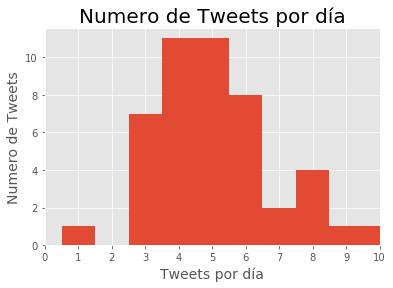

In [32]:
by_date = tweets_base['Fecha'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(0,12), align='left')
plt.xticks(range(0,12))
plt.xlim(0, 10)
plt.title("Numero de Tweets por día", fontdict={'fontsize': 20})
plt.ylabel("Numero de Tweets", fontdict={'fontsize': 14})
plt.xlabel("Tweets por día", fontdict={'fontsize': 14});
plt.savefig('hist_daily.png')

### Grafíco de Tweets por día en la semana

In [33]:
# Dia con metodo datetime
tweets_base['Dia'] = tweets_base['Fecha'].dt.dayofweek

# Creando diccionario con los dias de la semana
days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

# Para cada valor en dia de la semana
tweets_base['Dia'] = tweets_base['Dia'].apply(lambda x: days[x])

In [34]:
# Ordenar 

tweets_base['Dia'] = \
    pd.Categorical(tweets_base['Dia'], ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])

In [35]:
# Contar los dias de la semana

by_weekday = tweets_base['Dia'].value_counts().sortlevel()
by_weekday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Lunes        32
Martes       31
Miércoles    29
Jueves       47
Viernes      32
Sábado       32
Domingo      31
Name: Dia, dtype: int64

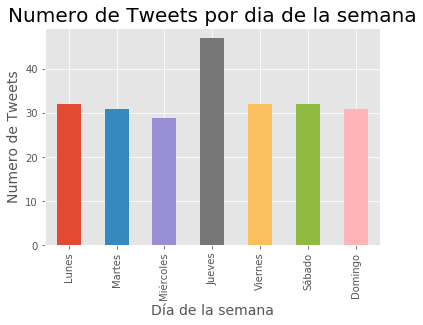

In [36]:
# Grafico dias de semana

by_weekday.plot.bar()
plt.title("Numero de Tweets por dia de la semana", fontdict={'fontsize': 20})
plt.ylabel("Numero de Tweets", fontdict={'fontsize': 14})
plt.xlabel("Día de la semana", fontdict={'fontsize': 14});
plt.savefig('bar_weekday.png')

### Word Cloud 

In [37]:
# Unir los tweets

todos_los_tweets = tweets_base.sin_punt.str.cat(sep=',')

In [38]:
# Minusculas

todos_los_tweets = todos_los_tweets.lower()

In [39]:
len(todos_los_tweets)

44168

In [40]:
# Tokenize texto

todos_los_tweets_tokens = word_tokenize(todos_los_tweets)

In [41]:
# Eliminate stopwords en Portugues

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_prt]

In [42]:
# Borrar stopwords en Portugues

stopwords_prt = stopwords.words('portuguese')

In [43]:
print (stopwords_prt)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [44]:
# Borrando StopWords

todos_los_tweets_tokens = no_stopwords(todos_los_tweets_tokens)

In [45]:
len(todos_los_tweets_tokens)

4712

In [46]:
# Analizando lista de frecuencia de los Tokens

nltk.FreqDist(todos_los_tweets_tokens).most_common()



[(',', 231),
 ('@', 91),
 ('brasil', 55),
 ('é', 46),
 ('governo', 36),
 ('todos', 33),
 ('sobre', 23),
 ('hoje', 19),
 ('ministro', 19),
 ('bolsonaro', 18),
 ('país', 17),
 ('nacional', 17),
 ('dia', 14),
 ('população', 14),
 ('sempre', 14),
 ('via', 14),
 ('grande', 13),
 ('educação', 13),
 ('assista', 13),
 ('r', 12),
 ('nova', 12),
 ('presidente', 11),
 ('paulo', 11),
 ('trabalho', 11),
 ('2019', 10),
 ('ser', 10),
 ('👍🏻', 10),
 ('boa', 10),
 ('recursos', 10),
 ('liberdade', 10),
 ('live', 9),
 ('pouco', 9),
 ('bilhões', 9),
 ('maior', 9),
 ('empregos', 9),
 ('novo', 9),
 ('sendo', 9),
 ('parte', 9),
 ('rt', 9),
 ('vez', 9),
 ('2018', 9),
 ('anos', 9),
 ('estados', 9),
 ('ano', 9),
 ('entenda', 9),
 ('economia', 9),
 ('programa', 9),
 ('brasileiro', 8),
 ('saúde', 8),
 ('semana', 8),
 ('previdência', 8),
 ('após', 8),
 ('jair', 8),
 ('lei', 8),
 ('vamos', 8),
 ('neste', 8),
 ('mercado', 7),
 ('parabéns', 7),
 ('ministério', 7),
 ('agradeço', 7),
 ('alguns', 7),
 ('contingenciamento

### Gráfico de Tweets por día

In [47]:
# Agrupar por día, mes

by_month_day= pd.groupby(tweets_base, by=[tweets_base['Fecha'].dt.month, tweets_base['Fecha'].dt.day])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
day_labels = ['06-04','07-04','08-04','09-04','10-04','11-04','12-04','13-04','14-04','15-04','16-04','17-04',\
              '18-04','19-04','20-04','21-04','22-04','23-04','24-04','25-04','26-04','27-04','28-04','29-04',\
             '30-04','01-05','02-05','03-05','04-05','05-05','06-05','07-05','08-05','09-05','10-05','11-05',\
              '12-05','13-05','14-05','15-05','16-05','17-05','18-05','19-05','20-05','21-05','22-05']

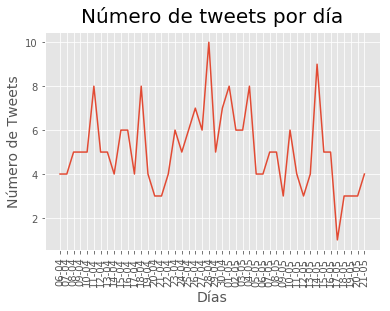

In [49]:
by_day = by_month_day['Fecha'].agg('count')
by_day.plot()
plt.title("Número de tweets por día", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de Tweets", fontdict={'fontsize': 14})
plt.xlabel("Días", fontdict={'fontsize': 14})
labels = day_labels
plt.xticks(range(46), labels, rotation='vertical')
plt.savefig('line_month.png')

### Palabras más usadas

In [50]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [51]:
tweets_base['brasil'] = [col_counter(tweets_base['no_stopwords'][i], 'brasil') for i in range(len(tweets_base['no_stopwords']))]

In [52]:
tweets_base['governo'] = [col_counter(tweets_base['no_stopwords'][i], 'governo') for i in range(len(tweets_base['no_stopwords']))]

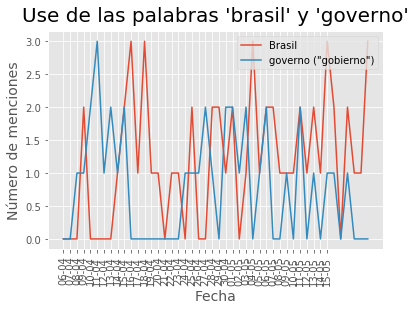

In [53]:
brasil_by_day = by_month_day['brasil'].agg('sum')
governo_by_day = by_month_day['governo'].agg('sum')

brasil_by_day.plot()
governo_by_day.plot()

plt.title("Use de las palabras 'brasil' y 'governo'", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Fecha", fontdict={'fontsize': 14})
labels = day_labels
plt.xticks(range(40), labels, rotation='vertical')
plt.legend(['Brasil', 'governo ("gobierno")'], loc='upper right');
plt.savefig('brasil_governo_day.png')

### Palabras importantes - Política Pública

In [54]:
palabras_interes = ('brasil','deus','governo','povo','ministro','militar','brasileiro','trabalho','economía','arma',\
                    'segurança', 'comunismo','socialismo','lula', 'poder', 'justiça', 'venezuela','educação','religião',\
                     "pt",'emprego','nacional','país','impostos','corrupção')

In [55]:
# Filtro token lista de interes

tokens_de_interes = [w for w in todos_los_tweets_tokens if w in palabras_interes]

In [56]:
# Uninendo lista

tokens_of_interes_str = ' '.join(tokens_de_interes)

In [57]:
fdist = nltk.FreqDist(tokens_de_interes)

In [58]:
fdist.most_common()

[('brasil', 55),
 ('governo', 36),
 ('ministro', 19),
 ('país', 17),
 ('nacional', 17),
 ('educação', 13),
 ('trabalho', 11),
 ('brasileiro', 8),
 ('povo', 6),
 ('deus', 5),
 ('segurança', 5),
 ('emprego', 4),
 ('venezuela', 4),
 ('pt', 4),
 ('lula', 3),
 ('militar', 3),
 ('impostos', 3),
 ('corrupção', 3),
 ('socialismo', 2),
 ('poder', 2),
 ('justiça', 1)]

In [59]:
len(palabras_interes)

25

In [60]:
tweets_base['deus'] = [col_counter(tweets_base['no_stopwords'][i], 'deus') for i in range(len(tweets_base['no_stopwords']))]

In [61]:
tweets_base['povo'] = [col_counter(tweets_base['no_stopwords'][i], 'povo') for i in range(len(tweets_base['no_stopwords']))]

In [62]:
tweets_base['ministro'] = [col_counter(tweets_base['no_stopwords'][i], 'ministro') for i in range(len(tweets_base['no_stopwords']))]

In [63]:
tweets_base['brasileiro'] = [col_counter(tweets_base['no_stopwords'][i], 'brasileiro') for i in range(len(tweets_base['no_stopwords']))]

In [64]:
tweets_base['emprego'] = [col_counter(tweets_base['no_stopwords'][i], 'emprego') for i in range(len(tweets_base['no_stopwords']))]

In [65]:
tweets_base['trabalho'] = [col_counter(tweets_base['no_stopwords'][i], 'trabalho') for i in range(len(tweets_base['no_stopwords']))]

In [66]:
tweets_base['economía'] = [col_counter(tweets_base['no_stopwords'][i], 'economía') for i in range(len(tweets_base['no_stopwords']))]

In [67]:
tweets_base['segurança'] = [col_counter(tweets_base['no_stopwords'][i], 'segurança') for i in range(len(tweets_base['no_stopwords']))]

In [68]:
tweets_base['poder'] = [col_counter(tweets_base['no_stopwords'][i], 'poder') for i in range(len(tweets_base['no_stopwords']))]

In [69]:
tweets_base['arma'] = [col_counter(tweets_base['no_stopwords'][i], 'arma') for i in range(len(tweets_base['no_stopwords']))]

In [70]:
tweets_base['justiça'] = [col_counter(tweets_base['no_stopwords'][i], 'justiça') for i in range(len(tweets_base['no_stopwords']))]

In [71]:
tweets_base['religião'] = [col_counter(tweets_base['no_stopwords'][i], 'religião') for i in range(len(tweets_base['no_stopwords']))]

In [72]:
tweets_base['socialismo'] = [col_counter(tweets_base['no_stopwords'][i], 'socialismo') for i in range(len(tweets_base['no_stopwords']))]

In [73]:
tweets_base['pt'] = [col_counter(tweets_base['no_stopwords'][i], 'pt') for i in range(len(tweets_base['no_stopwords']))]

In [74]:
tweets_base['lula'] = [col_counter(tweets_base['no_stopwords'][i], 'lula') for i in range(len(tweets_base['no_stopwords']))]

In [75]:
tweets_base['comunismo'] = [col_counter(tweets_base['no_stopwords'][i], 'comunismo') for i in range(len(tweets_base['no_stopwords']))]

In [76]:
tweets_base['nacional'] = [col_counter(tweets_base['no_stopwords'][i], 'nacional') for i in range(len(tweets_base['no_stopwords']))]

In [77]:
tweets_base['país'] = [col_counter(tweets_base['no_stopwords'][i], 'país') for i in range(len(tweets_base['no_stopwords']))]

In [78]:
tweets_base['educação'] = [col_counter(tweets_base['no_stopwords'][i], 'educação') for i in range(len(tweets_base['no_stopwords']))]

In [79]:
tweets_base['impostos'] = [col_counter(tweets_base['no_stopwords'][i], 'impostos') for i in range(len(tweets_base['no_stopwords']))]

In [80]:
tweets_base['corrupção'] = [col_counter(tweets_base['no_stopwords'][i], 'corrupção') for i in range(len(tweets_base['no_stopwords']))]

In [81]:
tweets_base['venezuela'] = [col_counter(tweets_base['no_stopwords'][i], 'venezuela') for i in range(len(tweets_base['no_stopwords']))]

In [82]:
tweets_base['militar'] = [col_counter(tweets_base['no_stopwords'][i], 'militar') for i in range(len(tweets_base['no_stopwords']))]

In [83]:
deus_by_day = by_month_day['deus'].agg('sum')
povo_by_day = by_month_day['povo'].agg('sum')
ministro_by_day = by_month_day['ministro'].agg('sum')
brasileiro_by_day = by_month_day['brasileiro'].agg('sum')
emprego_by_day = by_month_day['emprego'].agg('sum')
trabalho_by_day = by_month_day['trabalho'].agg('sum')
economia_by_day = by_month_day['economía'].agg('sum')
segurança_by_day = by_month_day['segurança'].agg('sum')
poder_by_day = by_month_day['poder'].agg('sum')
arma_by_day = by_month_day['arma'].agg('sum')
justiça_by_day = by_month_day['justiça'].agg('sum')
religião_by_day = by_month_day['religião'].agg('sum')
socialismo_by_day = by_month_day['socialismo'].agg('sum')
pt_by_day = by_month_day['pt'].agg('sum')
lula_by_day = by_month_day['lula'].agg('sum')
comunismo_by_day = by_month_day['comunismo'].agg('sum')
nacional_by_day = by_month_day['nacional'].agg('sum')
pais_by_day = by_month_day['país'].agg('sum')
educação_by_day = by_month_day['educação'].agg('sum')
impostos_by_day = by_month_day['impostos'].agg('sum')
corrupção_by_day = by_month_day['corrupção'].agg('sum')
venezuela_by_day = by_month_day['venezuela'].agg('sum')
militar_by_day = by_month_day['militar'].agg('sum')

In [84]:
totals_by_topic = tweets_base.iloc[:,16:].sum()
totals_by_topic = totals_by_topic.sort_values(ascending=False)
totals_by_topic

brasil        55
governo       36
ministro      19
país          17
nacional      17
educação      13
trabalho      11
brasileiro     8
povo           6
segurança      5
deus           5
pt             4
emprego        4
venezuela      4
militar        3
lula           3
impostos       3
corrupção      3
poder          2
socialismo     2
justiça        1
economía       0
arma           0
religião       0
comunismo      0
dtype: int64

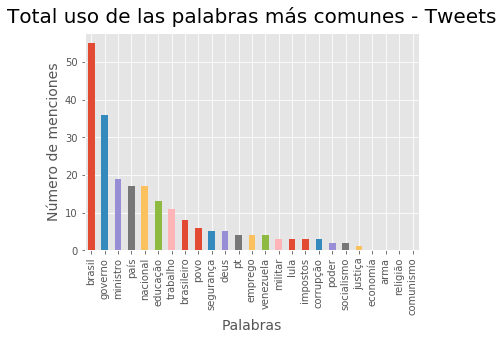

In [85]:
totals_by_topic.plot(kind='bar')

plt.title("Total uso de las palabras más comunes - Tweets", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Palabras", fontdict={'fontsize': 14})
plt.savefig("topics_total.png")



In [86]:
all_tweets_Text = nltk.Text(todos_los_tweets_tokens)
all_tweets_Text

<Text: live 23 maio 2019 daqui pouco 19h espero...>

In [87]:
all_tweets_Text.collocations(num = 50)

jair bolsonaro; estados unidos; paulo guedes; nova previdência; fake
news; meio ambiente; 100 dias; ministro educação; link youtube; daqui
pouco; nacional pescadores; jovem pan; pacote anticrimes; cada vez;
governo federal; colégio militar; diferença corte; forte abraço;
medida provisória; liberdade econômica; projeto lei; ano passado;
geração empregos; cadastro nacional; boa noite; primeiro trimestre;
ambiental urbana; capital estrangeiro; dados oficiais; decretos
desnecessários; funcionamento unidades; massa manobra; national
congress; perfis genéticos; reforma tributária; rádio bandeirantes;
shalom 🇧🇷🇮🇱; tire conclusões; óleo diesel; corte contingenciamento;
grande dia; carne frango; colocando prática; desconhecia diferença;
direitos humanos; horário funcionamento; informações realizações;
silvio santos; trimestre 2019; novo cadastro


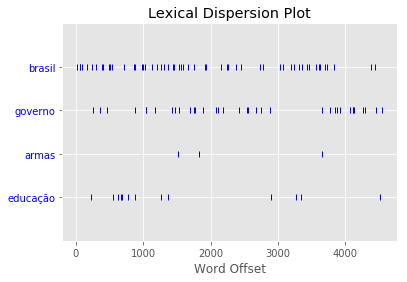

In [88]:
all_tweets_Text.dispersion_plot(["brasil", "governo", "armas","educação"])

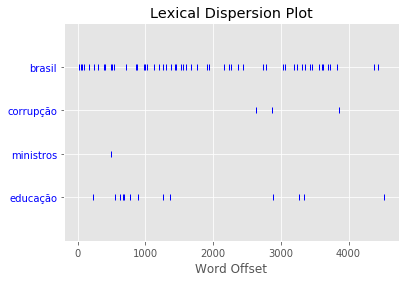

In [89]:
all_tweets_Text.dispersion_plot(["brasil", "corrupção", "ministros","educação"])

In [90]:
all_tweets_Text.concordance('brasil', width = 100)

Displaying 25 of 55 matches:
iatchrysler anunciou irá investir r 16 bilhões brasil 2024 maior ciclo investimento história empresa
orre hoje paris eua reafirmaram apoio ingresso brasil organização atualmente todos 36 membros ocde a
mbros ocde apoiam entrada fruto confiança novo brasil construindo livre aberto justo 👍 , aeroporto c
ração tão fortes shalom 🇧🇷🇮🇱 embaixador israel brasil yossi shelley , aprovada senado mp libera capi
ita vem sendo voz principal decisões políticas brasil deve tomar , ministro saúde encontrou estoque 
ação equivalente r 25 bilhões dinheiro retorna brasil pode ser aplicado áreas ligação petrolífera , 
o , nova previdência é porta entrada progresso brasil é aprovação viabilizam diversas outras ações e
somente apoio todos poderemos mudar vez futuro brasil 👍 , visita alunos alvorada residência oficial 
ho agradeço deus vida missão conduzir destinos brasil 🇧🇷🇧🇷🇧🇷 , seminaristas querem proibir termo fak
ersamos sobre determinação restaurar lei ordem brasil , andré 

In [91]:
all_tweets_Text.concordance('governo', width = 100)

Displaying 25 of 36 matches:
ra , anulei legislativo comprando votos plano governo controle mídia internet levou facada militant
dre garcia faz análise impecável sobre contra governo jair bolsonaro motivos assista , tomei conhec
mclaren válido 5 anos momento empresa decisão governo busca maneira rescindir contrato boa noite to
unidos é grande carinho amor brasil confiança governo 🇧🇷👍🏻 , ministro educação @ abrahamweint mostr
o ações número aumentado certamente culpariam governo , governo federal moderniza normas saúde simp
mero aumentado certamente culpariam governo , governo federal moderniza normas saúde simplificando 
rte mídia oposição fazem desestabilizar atual governo todos sabemos assim interesse gigantesco máqu
m falar desemprego cobrar crescimento 4 meses governo nenhuma responsabilidade sobre atual situação
ficiando economia população estado , novidade governo jair bolsonaro 2000 escolas nordeste instalad
rrovias portos aeroportos rodovias promovidos governo levarão desenvolv

In [92]:
all_tweets_Text.concordance('educação', width = 100)

Displaying 13 of 13 matches:
multa petrobrás acordada lava jato ministério educação equivalente r 25 bilhões dinheiro retorna bra
rasil fim alimentar , dilma cortou 10 bilhões educação doou 50 bilhões países amigos algumas ditadur
ngenciamento todos governos fizeram inclusive educação aqui estados unidos repórter folha desconheci
t @ jornaloglobo após protestos contra cortes educação bolsonaro publica vídeo pais alunos escola pa
ngenciamento todos governos fizeram inclusive educação aqui estados unidos repórter folha desconheci
al generalizado sofre é povo palavra ministro educação , it was great pleasure senator the brazilian
amor brasil confiança governo 🇧🇷👍🏻 , ministro educação @ abrahamweint mostra hipocrisia política deb
crimes melhorando segurança brasil , ministro educação professor @ abrahamweint explica diferença co
s internet banda larga @ astropontes ministro educação @ abrahamweint participamos videoconferência 
uíram tudo nome pátria bolivariana , ministro educação @ abrah

In [93]:
palabras_interes_mas = ('brasil','deus','governo','povo','mundo','estado','presidente','ministro','militar''ministros','exercito',\
                    'estados','brasileiro','nesse','trabalho','economia','armas', 'segurança', 'comunismo','socialismo', 'izquerda',\
                    'agro', 'estados unidos', 'lula', 'poder', 'biblía','familia', 'justiça', 'congreso', 'republica', 'venezuela',\
                    'cuba','educação','saude','ley','proceso','contra','amor','certo','mec','policia','homofobia','doentes','religião',\
                   'gay','protecão','mujeres','muerte','guerra','drogras','desemvolvimento', "pt", "haddad",'violencia','jovens','joão','arma')

In [94]:
# Filtrar lista de todos los tokens basado en lista de palabras de interes

tokens_de_interes_mas = [w for w in todos_los_tweets_tokens if w in palabras_interes_mas]

In [95]:
# Unienndo la lista como str

tokens_of_interest_str = ' '.join(tokens_de_interes_mas)

In [96]:
fdist = nltk.FreqDist(tokens_de_interes_mas)

In [97]:
fdist.most_common()

[('brasil', 55),
 ('governo', 36),
 ('ministro', 19),
 ('educação', 13),
 ('presidente', 11),
 ('trabalho', 11),
 ('estados', 9),
 ('economia', 9),
 ('brasileiro', 8),
 ('estado', 6),
 ('povo', 6),
 ('deus', 5),
 ('contra', 5),
 ('mundo', 5),
 ('segurança', 5),
 ('venezuela', 4),
 ('pt', 4),
 ('lula', 3),
 ('amor', 3),
 ('armas', 3),
 ('jovens', 3),
 ('joão', 2),
 ('guerra', 2),
 ('socialismo', 2),
 ('poder', 2),
 ('cuba', 2),
 ('familia', 1),
 ('certo', 1),
 ('nesse', 1),
 ('justiça', 1)]

In [98]:
len(todos_los_tweets)

44168

In [99]:
len(set(todos_los_tweets))

72